In [1]:
import pandas as pd

# Daten einlesen
# Destatis Ausländerstatistik 12521-0021 
# ACHTUNG: Ländergruppierungen_Label 'insgesamt' sind die korrekten Werte. Die Ländergruppierungen überschneiden sich.
url = "https://raw.githubusercontent.com/Antonijatzele/DSI_Abschlussprojekt/refs/heads/main/Daten/Destatis_Ausl%C3%A4nderstatistik_12521-0021_aufbereitet.csv"
df = pd.read_csv(url)


In [2]:
# Überblick
df.head()

,Stichtag,Bundesland,Geschlecht,Ländergruppierungen_Code,Ländergruppierungen_Label,Anzahl,Ausländer
0,2024-12-31,Sachsen,männlich,EUROPA-EG-12,EG-12 (bis 31.12.1994),12355,Ausländer
1,2024-12-31,Saarland,männlich,AFRIKASUED,Südafrika,50,Ausländer
2,2024-12-31,Hamburg,weiblich,AFRIKA,Afrika,14335,Ausländer
3,2024-12-31,Bremen,weiblich,AMERIKASUD,Südamerika,985,Ausländer
4,2024-12-31,Mecklenburg-Vorpommern,männlich,DRITT-EU-25,Drittstaaten zu EU-25 (bis 31.12.2006),50995,Ausländer


In [1]:
# Anzahl Ausländer nach Bundesland
# df.groupby("Bundesland")["Anzahl"].sum().sort_values(ascending=False)

In [3]:
df.nunique()

Stichtag                        1
Bundesland                     16
Geschlecht                      2
Ländergruppierungen_Code       40
Ländergruppierungen_Label      41
Anzahl                       1221
Ausländer                       1
dtype: int64

In [4]:
# Länderguppierungen_code ist dort null wo Ländergruppierungen_label = 'Insgesamt'
df.isnull().sum()

Stichtag                      0
Bundesland                    0
Geschlecht                    0
Ländergruppierungen_Code     32
Ländergruppierungen_Label     0
Anzahl                        0
Ausländer                     0
dtype: int64

In [2]:
# Ausländer nach Ländergruppe
#df.groupby("Ländergruppierungen_Label")["Anzahl"].sum().sort_values(ascending=False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_3820\2211332928.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


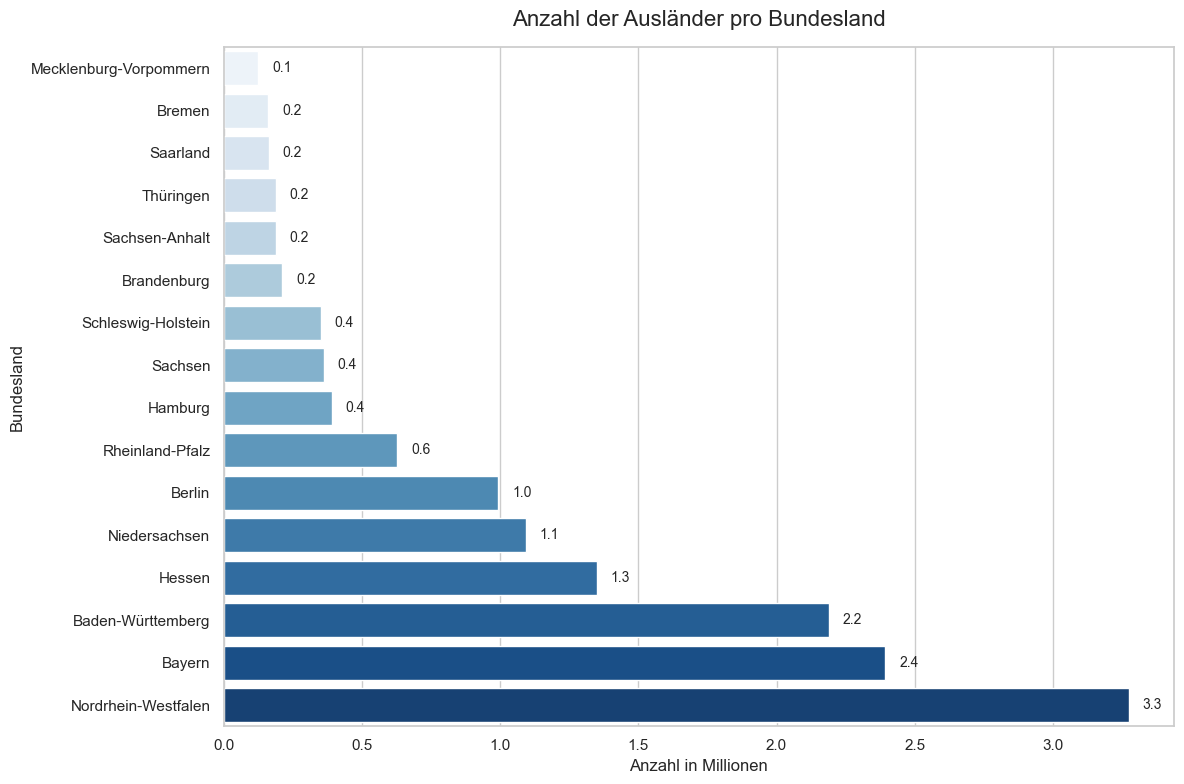

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Seaborn-Stil aktivieren
sns.set(style="whitegrid")

# Filter und Aggregation
df_filtered = df[df['Ländergruppierungen_Label'] == 'Insgesamt']
bundesland_summe = df_filtered.groupby('Bundesland')['Anzahl'].sum().reset_index()

# Werte in Millionen
bundesland_summe["Anzahl_Mio"] = bundesland_summe["Anzahl"] / 1e6

# Sortiere aufsteigend
bundesland_summe = bundesland_summe.sort_values("Anzahl_Mio", ascending=True).reset_index(drop=True)

# Farben nach Wert mappen: klein = hell, groß = dunkel
norm = plt.Normalize(bundesland_summe["Anzahl_Mio"].min(), bundesland_summe["Anzahl_Mio"].max())
colors = sns.color_palette("Blues", n_colors=len(bundesland_summe))
colors_sorted = [colors[i] for i in np.argsort(bundesland_summe["Anzahl_Mio"])]

# Plot erstellen
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=bundesland_summe,
    y="Bundesland",
    x="Anzahl_Mio",
    palette=colors_sorted
)

# Titel und Achsentitel
plt.title("Anzahl der Ausländer pro Bundesland", fontsize=16, pad=15)
plt.xlabel("Anzahl in Millionen", fontsize=12)
plt.ylabel("Bundesland", fontsize=12)

# X-Achse formatieren
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}"))

# Optional: Zahlen an Balken anzeigen
for i, value in enumerate(bundesland_summe["Anzahl_Mio"]):
    ax.text(value + 0.05, i, f"{value:.1f}", va='center', fontsize=10)

# Layout optimieren
plt.tight_layout()
plt.show()

In [ ]:
# Aus welchen Ländergruppierungen kommen die meisten Migranten?